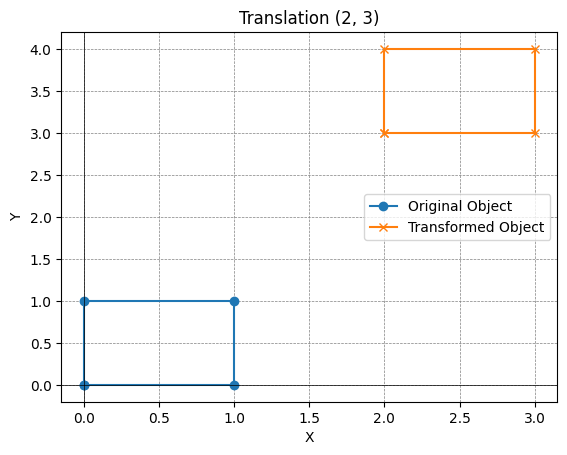

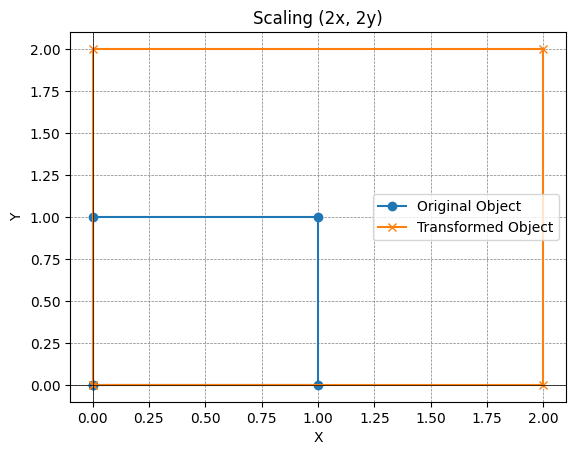

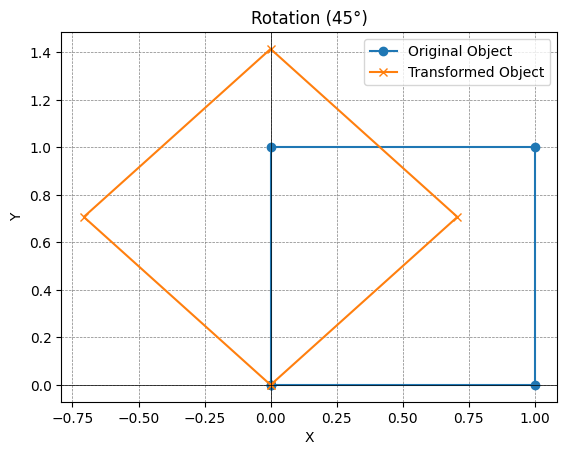

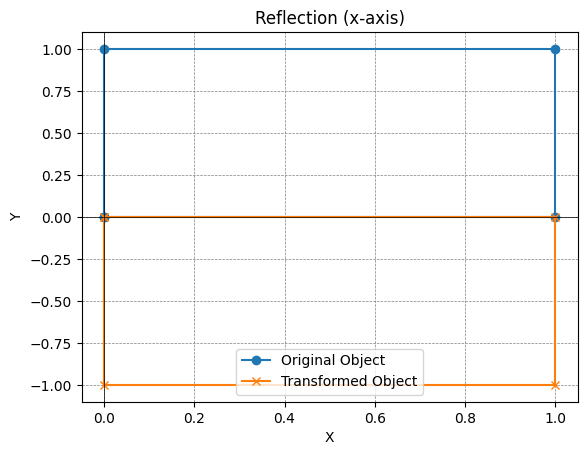

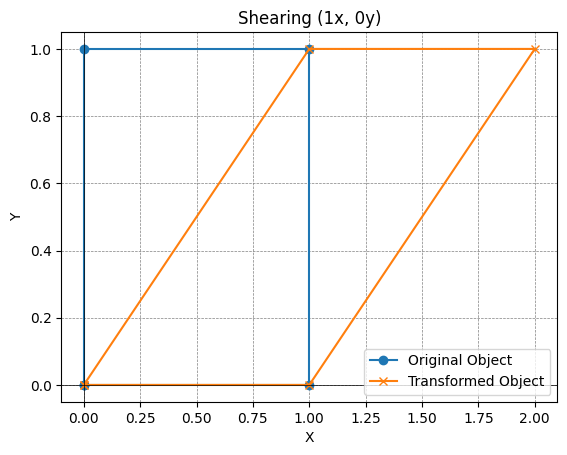

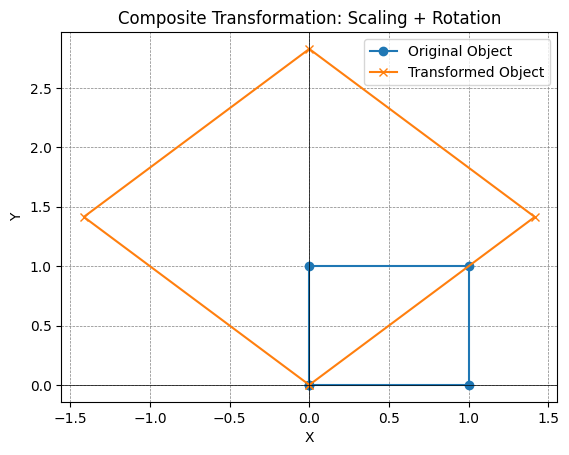

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original 2D object (e.g., a square)
object_coords = np.array([
    [0, 0, 1],  # Bottom-left
    [1, 0, 1],  # Bottom-right
    [1, 1, 1],  # Top-right
    [0, 1, 1],  # Top-left
    [0, 0, 1]   # Closing the square
])

# Transformation matrices
def translation_matrix(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

def scaling_matrix(sx, sy):
    return np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])

def rotation_matrix(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

def reflection_matrix(axis):
    if axis == 'x':
        return np.array([
            [1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    elif axis == 'y':
        return np.array([
            [-1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ])
    elif axis == 'origin':
        return np.array([
            [-1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])

def shearing_matrix(sh_x, sh_y):
    return np.array([
        [1, sh_x, 0],
        [sh_y, 1, 0],
        [0, 0, 1]
    ])

# Apply transformation function
def apply_transformation(object_coords, transformation_matrix):
    return np.dot(object_coords, transformation_matrix.T)

# Plot function
def plot_transformation(original, transformed, title):
    plt.figure()
    plt.plot(original[:, 0], original[:, 1], label="Original Object", marker='o')
    plt.plot(transformed[:, 0], transformed[:, 1], label="Transformed Object", marker='x')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

# Define transformations
translation = translation_matrix(2, 3)
scaling = scaling_matrix(2, 2)
rotation = rotation_matrix(np.pi / 4)  # 45 degrees
reflection_x = reflection_matrix('x')
shearing = shearing_matrix(1, 0)

# Composite transformation: Scaling followed by Rotation
composite_transformation = np.dot(rotation, scaling)

# Apply and plot all transformations
transformed_translation = apply_transformation(object_coords, translation)
plot_transformation(object_coords, transformed_translation, "Translation (2, 3)")

transformed_scaling = apply_transformation(object_coords, scaling)
plot_transformation(object_coords, transformed_scaling, "Scaling (2x, 2y)")

transformed_rotation = apply_transformation(object_coords, rotation)
plot_transformation(object_coords, transformed_rotation, "Rotation (45°)")

transformed_reflection = apply_transformation(object_coords, reflection_x)
plot_transformation(object_coords, transformed_reflection, "Reflection (x-axis)")

transformed_shearing = apply_transformation(object_coords, shearing)
plot_transformation(object_coords, transformed_shearing, "Shearing (1x, 0y)")

transformed_composite = apply_transformation(object_coords, composite_transformation)
plot_transformation(object_coords, transformed_composite, "Composite Transformation: Scaling + Rotation")


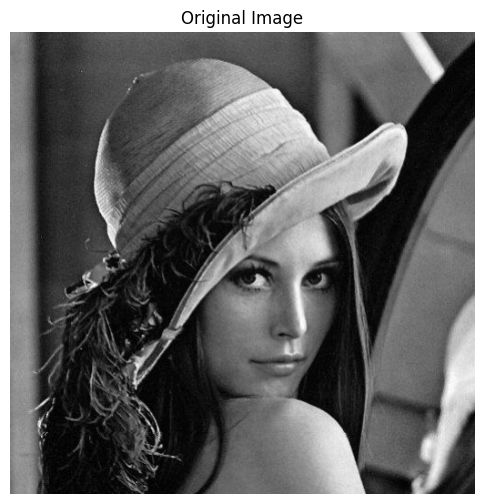

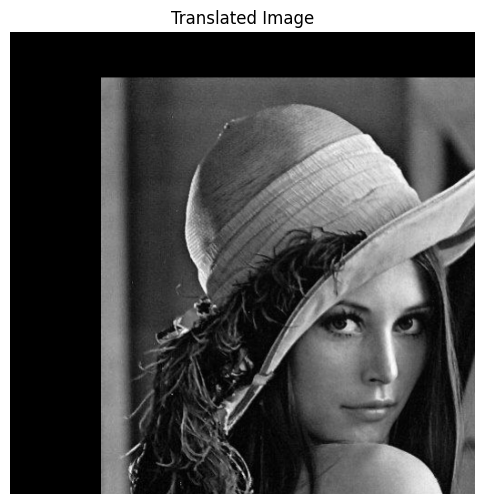

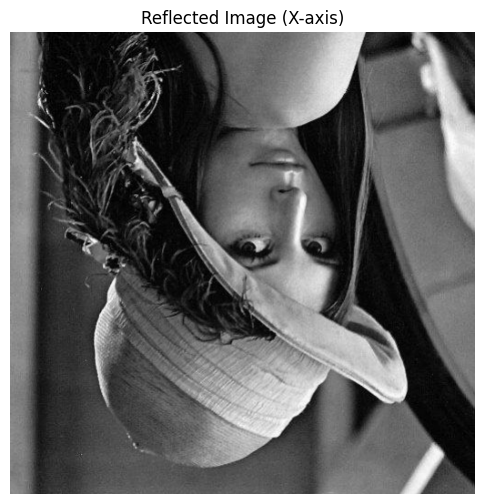

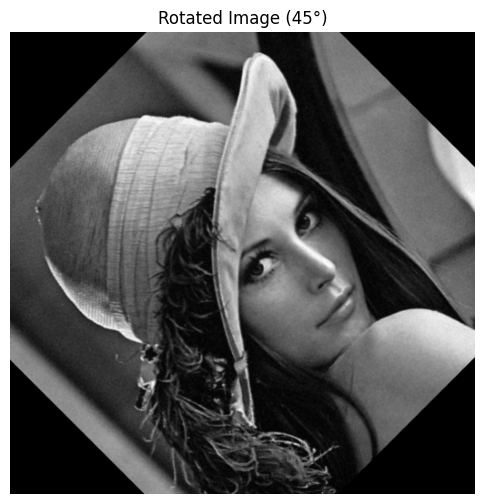

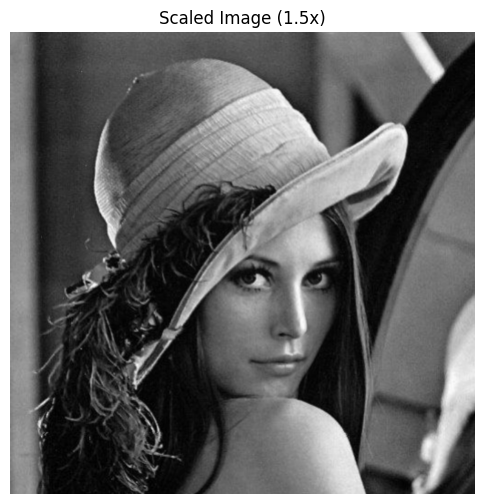

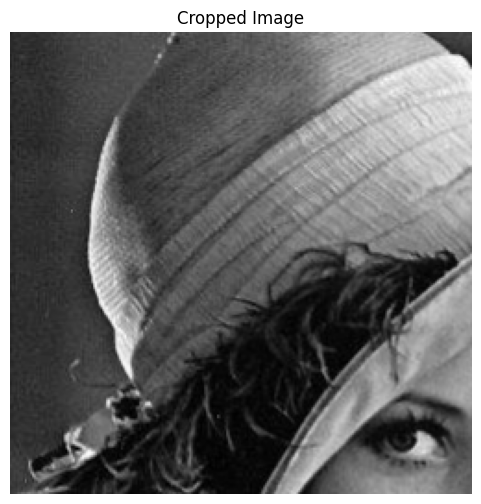

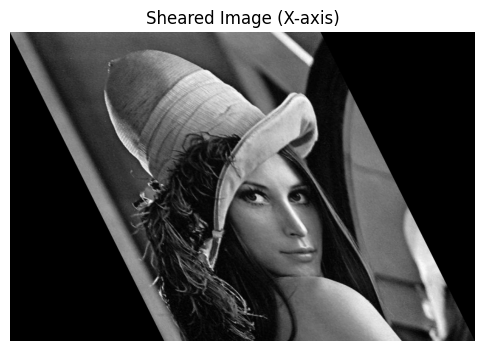

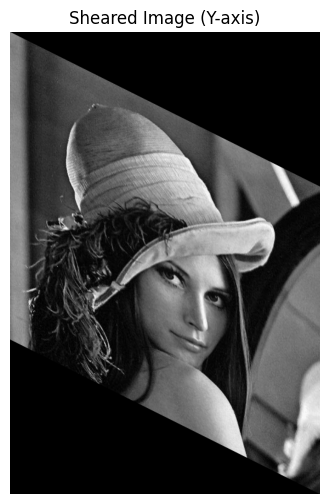

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def display_image(title, image):
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image
image_path = "/content/CV IMAGE.png"  # Replace with the path to your image
image = cv2.imread(image_path)
display_image("Original Image", image)

# Image Translation
def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
    return translated_image

translated = translate_image(image, 100, 50)  # Translate by 100 pixels right and 50 pixels down
display_image("Translated Image", translated)

# Image Reflection
def reflect_image(image, axis='x'):
    if axis == 'x':
        reflected_image = cv2.flip(image, 0)
    elif axis == 'y':
        reflected_image = cv2.flip(image, 1)
    else:  # Both axes
        reflected_image = cv2.flip(image, -1)
    return reflected_image

reflected = reflect_image(image, axis='x')  # Reflect across the x-axis
display_image("Reflected Image (X-axis)", reflected)

# Image Rotation
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

rotated = rotate_image(image, 45)  # Rotate 45 degrees
display_image("Rotated Image (45°)", rotated)

# Image Scaling
def scale_image(image, fx, fy):
    scaled_image = cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled_image

scaled = scale_image(image, 1.5, 1.5)  # Scale by 1.5x
display_image("Scaled Image (1.5x)", scaled)

# Image Cropping
def crop_image(image, start_row, start_col, end_row, end_col):
    cropped_image = image[start_row:end_row, start_col:end_col]
    return cropped_image

cropped = crop_image(image, 50, 50, 300, 300)  # Crop a region
display_image("Cropped Image", cropped)

# Image Shearing in x-axis
def shear_image_x(image, shear_factor):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared_image_x = cv2.warpAffine(image, shear_matrix, (int(cols + rows * shear_factor), rows))
    return sheared_image_x

sheared_x = shear_image_x(image, 0.5)  # Shear by 0.5 along the x-axis
display_image("Sheared Image (X-axis)", sheared_x)

# Image Shearing in y-axis
def shear_image_y(image, shear_factor):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared_image_y = cv2.warpAffine(image, shear_matrix, (cols, int(rows + cols * shear_factor)))
    return sheared_image_y

sheared_y = shear_image_y(image, 0.5)  # Shear by 0.5 along the y-axis
display_image("Sheared Image (Y-axis)", sheared_y)
